<a href="https://colab.research.google.com/github/GeeteshT/Project/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFTxava84zqiAFm1clsf6prtbYEn8PQg5oISGx6z9RD0TDhQv0ZpyE
Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv(r"/gdrive/My Drive/Project/titanic_train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
missing_feature=[col for col in df.columns if(df[col].isnull().sum()>1)]
print(missing_feature)

['Age', 'Cabin', 'Embarked']


In [ ]:
for col in missing_feature:
  print(col,round(df[col].isnull().mean(),4))

Age 0.1987
Cabin 0.771
Embarked 0.0022


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

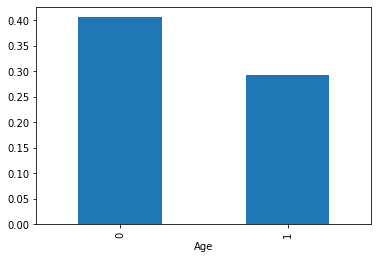

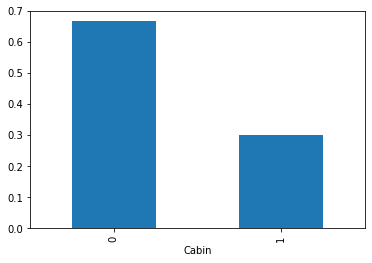

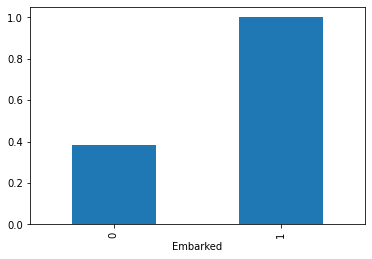

In [ ]:
for col in missing_feature:
  data=df.copy()
  data[col]=np.where(data[col].isnull(),1,0)
  data.groupby(col)["Survived"].mean().plot.bar()
  plt.show()

The cabin has the highst percentage of missing values i.e 77% and also from above we can see that it does not make much impact on the data frame.

In [ ]:
for col in df.select_dtypes("object").columns:
  print(col,len(df[col].unique()))

Name 891
Sex 2
Ticket 681
Cabin 148
Embarked 4


In [ ]:
df["new_sex"]=np.where(df["Sex"]=="male",1,0)

In [ ]:
df.select_dtypes("object").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
for col in df.select_dtypes("object").columns:
  print(df[col].value_counts())

McEvoy, Mr. Michael                  1
Parkes, Mr. Francis "Frank"          1
Coleff, Mr. Satio                    1
Frolicher-Stehli, Mr. Maxmillian     1
Hewlett, Mrs. (Mary D Kingcome)      1
                                    ..
Greenfield, Mr. William Bertram      1
Keefe, Mr. Arthur                    1
Hosono, Mr. Masabumi                 1
Byles, Rev. Thomas Roussel Davids    1
Sinkkonen, Miss. Anna                1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
347082        7
1601          7
CA. 2343      7
3101295       6
CA 2144       6
             ..
347083        1
349225        1
PC 17754      1
C.A. 24579    1
371362        1
Name: Ticket, Length: 681, dtype: int64
C23 C25 C27    4
B96 B98        4
G6             4
D              3
F33            3
              ..
D7             1
C87            1
D11            1
F G63          1
C110           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embark

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'new_sex'],
      dtype='object')

In [ ]:
df.drop(["PassengerId","Name","Sex","Cabin"],axis=1,inplace=True)

In [ ]:
for col in df.columns:
  print("====={}======".format(col))
  print(df[col].value_counts())
  print(len(df[col].unique()))

=====Survived======
0    549
1    342
Name: Survived, dtype: int64
2
=====Pclass======
3    491
1    216
2    184
Name: Pclass, dtype: int64
3
=====Age======
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
89
=====SibSp======
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
7
=====Parch======
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
7
=====Ticket======
347082        7
1601          7
CA. 2343      7
3101295       6
CA 2144       6
             ..
347083        1
349225        1
PC 17754      1
C.A. 24579    1
371362        1
Name: Ticket, Length: 681, dtype: int64
681
=====Fare======
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
248
=====

In [ ]:
df.drop("Ticket",axis=1,inplace=True)

In [ ]:
numerical_feature=[col for col in df.columns if(df[col].dtypes!="O")]
print(numerical_feature)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'new_sex']


In [ ]:
for col in numerical_feature:
  print(col,len(df[col].unique()))

Survived 2
Pclass 3
Age 89
SibSp 7
Parch 7
Fare 248
new_sex 2


In [ ]:
discrete_value=[col for col in numerical_feature if len(df[col].unique())<8]
print(discrete_value)

['Survived', 'Pclass', 'SibSp', 'Parch', 'new_sex']


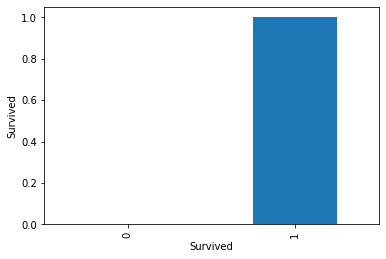

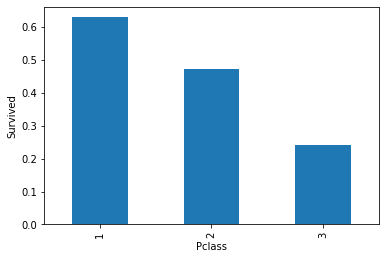

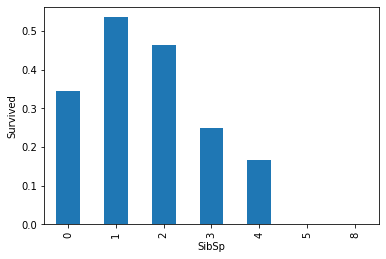

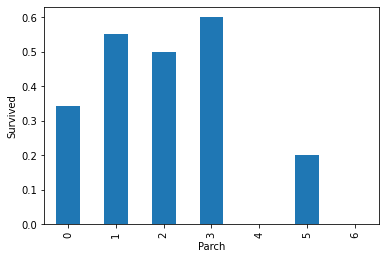

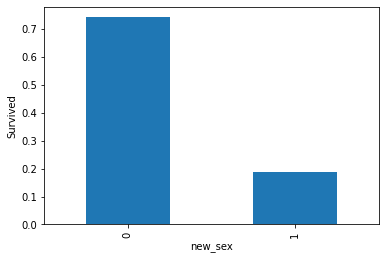

In [ ]:
for col in discrete_value:
  df.groupby(col)["Survived"].mean().plot.bar()
  plt.xlabel(col)
  plt.ylabel("Survived")
  plt.show()

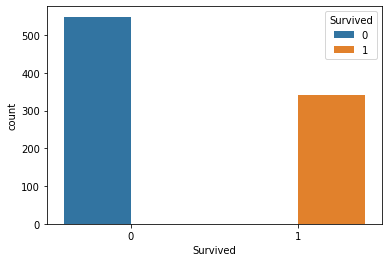

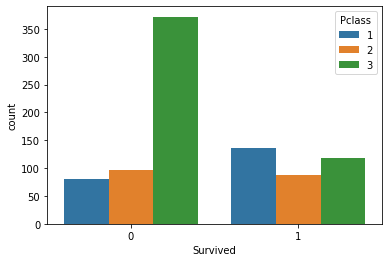

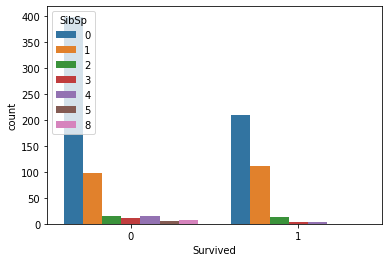

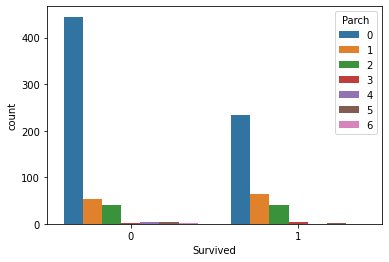

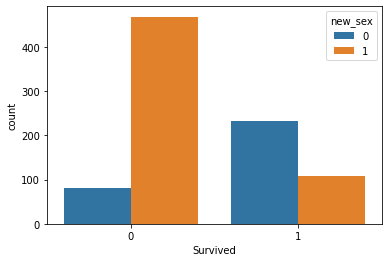

In [ ]:
for col in discrete_value:
  sns.countplot(x="Survived",hue=col,data=df)
  plt.show()

In [ ]:
continous_value=[col for col in numerical_feature if col not in discrete_value]
print(continous_value)

['Age', 'Fare']


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


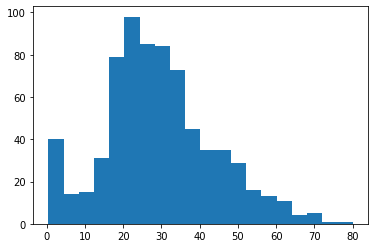

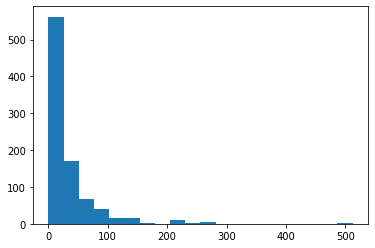

In [ ]:
for col in continous_value:
  plt.hist(df[col],bins=20)
  plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


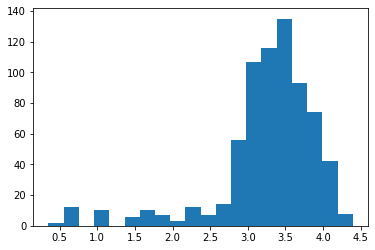

In [ ]:
for col in continous_value:
  data=df.copy()
  if 0 in data[col].unique():
    pass 
  else:
    data[col]=np.log(df[col]+1)
    plt.hist(data[col],bins=20)
    plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


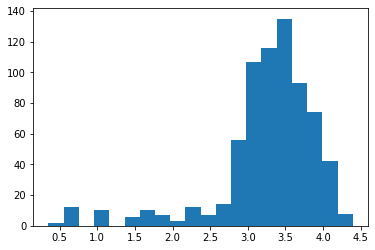

In [ ]:
for col in continous_value:
  if 0 in df[col].unique():
    pass 
  else:
    df[col]=np.log(df[col]+1)
    plt.hist(df[col],bins=20)
    plt.show()

In [ ]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [ ]:
df["Embarked"].fillna("S",inplace=True)

In [ ]:
for col in df.select_dtypes("object").columns:
  dummy=pd.get_dummies(df[col],prefix=col,drop_first=True)
  df=pd.concat([df,dummy],axis=1)
  del df[col]
  print(col)
del dummy

Embarked


In [ ]:
df.shape

(891, 9)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'new_sex',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test= train_test_split(df,test_size=0.2,random_state=10)

In [ ]:
for col in train.columns:
  if((col is not "Survived") and (train[col].isnull().sum()>1)):
    train.loc[train[col].isnull(),col]=train[col].median()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
for col in test.columns:
  if((col is not "Survived") and (test[col].isnull().sum()>1)):
    test.loc[test[col].isnull(),col]=train[col].median()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
x_train=train.drop("Survived",axis=1)
y_train=train["Survived"]
x_test=test.drop("Survived",axis=1)
y_test=test["Survived"]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
min_max=MinMaxScaler()

In [ ]:
min_max.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
x_train_min= min_max.transform(x_train)

In [ ]:
x_test_min=min_max.transform(x_test)

In [ ]:
st = StandardScaler()

In [ ]:
st.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x_train_scaler=st.transform(x_train)

In [ ]:
x_test_scaler=st.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr=LogisticRegression(penalty="l1",random_state=10,class_weight="balanced",solver="liblinear")

In [ ]:
logr.fit(x_train_min,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=10, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train,logr.predict(x_train_min))

0.7885912698412699

In [ ]:
roc_auc_score(y_test,logr.predict(x_test_min))

0.8215467328370555

In [ ]:
logr.classes_

array([0, 1])

In [ ]:
logr.predict_proba(x_test_min)

array([[0.86202378, 0.13797622],
       [0.81667549, 0.18332451],
       [0.83911831, 0.16088169],
       [0.05903215, 0.94096785],
       [0.10153819, 0.89846181],
       [0.81204732, 0.18795268],
       [0.83589556, 0.16410444],
       [0.7471611 , 0.2528389 ],
       [0.85540055, 0.14459945],
       [0.82506797, 0.17493203],
       [0.66792352, 0.33207648],
       [0.04636283, 0.95363717],
       [0.2593784 , 0.7406216 ],
       [0.45962266, 0.54037734],
       [0.68753138, 0.31246862],
       [0.68294312, 0.31705688],
       [0.94483471, 0.05516529],
       [0.82528089, 0.17471911],
       [0.37143498, 0.62856502],
       [0.7603673 , 0.2396327 ],
       [0.8862772 , 0.1137228 ],
       [0.59348079, 0.40651921],
       [0.2255058 , 0.7744942 ],
       [0.87918596, 0.12081404],
       [0.64588497, 0.35411503],
       [0.81667549, 0.18332451],
       [0.81667549, 0.18332451],
       [0.24655676, 0.75344324],
       [0.75872597, 0.24127403],
       [0.06465493, 0.93534507],
       [0.

In [ ]:
logr.class_weight

'balanced'

In [ ]:
prob_score= pd.Series(list(zip(*logr.predict_proba(x_train_min)))[1])

In [ ]:
prob_score

0      0.237684
1      0.853897
2      0.612431
3      0.540377
4      0.198252
         ...   
707    0.964690
708    0.174932
709    0.540377
710    0.267377
711    0.284917
Length: 712, dtype: float64

In [ ]:
cutoffs=np.linspace(0,1,100)

In [ ]:
KS_cut = []
for cutoff in cutoffs:
    predicted = pd.Series([0] * len(y_train))
    predicted[prob_score>cutoff] = 1
    df_logr = pd.DataFrame(list(zip(y_train, predicted)), columns=["real", "predicted"])
    TP = len(df_logr[(df_logr["real"] == 1) & (df_logr["predicted"] == 1)])
    FP = len(df_logr[(df_logr["real"] == 0) & (df_logr["predicted"] == 1)])
    TN = len(df_logr[(df_logr["real"] == 0) & (df_logr["predicted"] == 0)])
    FN = len(df_logr[(df_logr["real"] == 1) & (df_logr["predicted"] == 0)])
    
    P = TP + FN
    N = TN + FP
    
    KS = (TP/P) - (FP/N)
    KS_cut.append(KS)
    
cutoff_data = pd.DataFrame(list(zip(cutoffs, KS_cut)), columns=["cutoff", "KS"])
KS_cutoff = cutoff_data[cutoff_data["KS"] == cutoff_data["KS"].max()]["cutoff"]
print(KS_cutoff)

54    0.545455
Name: cutoff, dtype: float64


In [ ]:
prob_score_test=pd.Series(list(zip(*logr.predict_proba(x_test_min)))[1])
print(prob_score_test)

0      0.137976
1      0.183325
2      0.160882
3      0.940968
4      0.898462
         ...   
174    0.412373
175    0.369543
176    0.122150
177    0.104075
178    0.669005
Length: 179, dtype: float64


In [ ]:
predicted_test=pd.Series([0]*len(y_test))
predicted_test

0      0
1      0
2      0
3      0
4      0
      ..
174    0
175    0
176    0
177    0
178    0
Length: 179, dtype: int64

In [ ]:
predicted_test[prob_score_test> 0.545455] = 1 

In [ ]:
roc_auc_score(y_test,predicted_test)

0.8016266887234628

# **Decision Tree**

In [ ]:
from sklearn.tree import tree

In [ ]:
dtree= tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=20,class_weight="balanced")

In [ ]:
dtree.fit(x_train_min,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=20, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
dtree_predicted=dtree.predict(x_test_min)

In [ ]:
roc_auc_score(y_train,dtree.predict(x_train_min))

0.8295634920634921

In [ ]:
roc_auc_score(y_test,dtree_predicted)

0.845257788806176

In [ ]:
dtree_test=pd.DataFrame(list(zip(y_test,dtree_predicted)),columns=["real","predicted"])

In [ ]:
k=pd.crosstab(dtree_test["real"],dtree_test["predicted"])

In [ ]:
k

predicted,0,1
real,,
0,94,23
1,7,55


In [ ]:
TP=k.iloc[1,1]
FP=k.iloc[0,1]
TN=k.iloc[0,0]
FN=k.iloc[1,0]

P=TP+FN
N=FP+TN

print("Accuracy: ", (TP+TN)/(P+N))
print("Sensitivity: ", TP/P)
print("Specificity: ", TN/N)

Accuracy:  0.8324022346368715
Sensitivity:  0.8870967741935484
Specificity:  0.8034188034188035


In [ ]:
max_nodes = list(range(5,100))

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
mytree= tree.DecisionTreeClassifier(criterion="entropy",class_weight="balanced")

In [ ]:
param_dist={
    "max_leaf_nodes":randint(5,100),
    "max_depth":[range(1,100),None],  
}

In [ ]:
random_search= RandomizedSearchCV(mytree,param_distributions=param_dist,n_jobs=-1,verbose=2,cv=10)
random_search.fit(x_train_min,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,


In [ ]:
random_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=22, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

I am not using max_leaf_nodes=22, because i have tried various combinations for max_leaf_nodes and i was getting best result at 30. So even u can try different combinations and let me know which one gives the best combinations.

In [ ]:
dtree=tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=30, class_weight='balanced')
dtree.fit(x_train_min,y_train)
predicted=dtree.predict(x_test_min)
df_test=pd.DataFrame(list(zip(y_test,predicted)),columns=["real","predicted"])
k=pd.crosstab(df_test["real"],df_test["predicted"])
k

predicted,0,1
real,,
0,100,17
1,9,53


In [ ]:
TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)

53 100 17 9
Accuracy is : 0.8547486033519553
Sensitivity is : 0.8548387096774194
Specificity is : 0.8547008547008547


In [ ]:
roc_auc_score(y_train,dtree.predict(x_train_min))

0.8519841269841271

In [ ]:
roc_auc_score(y_test,dtree.predict(x_test_min))

0.8547697821891371

In [ ]:
new_df=pd.DataFrame(list(zip(x_train.columns,dtree.feature_importances_)),columns=["feature","Value"])

In [ ]:
df_new=new_df[new_df["Value"]>0]["feature"]

In [ ]:
df_new

0        Pclass
1           Age
2         SibSp
3         Parch
4          Fare
5       new_sex
7    Embarked_S
Name: feature, dtype: object

In [ ]:
df[df_new]

,Pclass,Age,SibSp,Parch,Fare,new_sex,Embarked_S
0,3,3.135494,1,0,7.2500,1,1
1,1,3.663562,1,0,71.2833,0,0
2,3,3.295837,0,0,7.9250,0,1
3,1,3.583519,1,0,53.1000,0,1
4,3,3.583519,0,0,8.0500,1,1
...,...,...,...,...,...,...,...
886,2,3.332205,0,0,13.0000,1,1
887,1,2.995732,0,0,30.0000,0,1
888,3,NaN,1,2,23.4500,0,1
889,1,3.295837,0,0,30.0000,1,0


In [ ]:
df_data=df[df_new]

In [ ]:
df_data["Survived"]=df["Survived"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_data

,Pclass,Age,SibSp,Parch,Fare,new_sex,Embarked_S,Survived
0,3,3.135494,1,0,7.2500,1,1,0
1,1,3.663562,1,0,71.2833,0,0,1
2,3,3.295837,0,0,7.9250,0,1,1
3,1,3.583519,1,0,53.1000,0,1,1
4,3,3.583519,0,0,8.0500,1,1,0
...,...,...,...,...,...,...,...,...
886,2,3.332205,0,0,13.0000,1,1,0
887,1,2.995732,0,0,30.0000,0,1,1
888,3,NaN,1,2,23.4500,0,1,0
889,1,3.295837,0,0,30.0000,1,0,1


In [ ]:
train,test=train_test_split(df_data,test_size=0.2,random_state=10)

In [ ]:
for col in train.columns:
  if((col not in "Survived") and (train[col].isnull().sum()>1)):
    train.loc[train[col].isnull(),col]=train[col].median()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
for col in test.columns:
  if((col not in "Survived") and (test[col].isnull().sum()>1)):
    test.loc[test[col].isnull(),col]=train[col].median()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
x_train=train.drop("Survived",axis=1)
y_train=train["Survived"]
x_test=test.drop("Survived",axis=1)
y_test=test["Survived"]

In [ ]:
min= MinMaxScaler()

In [ ]:
min.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
x_train_scaler=min.transform(x_train)

In [ ]:
x_test_scaler=min.transform(x_test)

In [ ]:
dtree=tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=30, class_weight='balanced')
dtree.fit(x_train_scaler,y_train)
predicted=dtree.predict(x_test_scaler)
df_test=pd.DataFrame(list(zip(y_test,predicted)),columns=["real","predicted"])
k=pd.crosstab(df_test["real"],df_test["predicted"])
k

predicted,0,1
real,,
0,100,17
1,9,53


In [ ]:
TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)

53 100 17 9
Accuracy is : 0.8547486033519553
Sensitivity is : 0.8548387096774194
Specificity is : 0.8547008547008547


In [ ]:
roc_auc_score(y_train,dtree.predict(x_train_scaler))

0.8519841269841271

In [ ]:
roc_auc_score(y_test,dtree.predict(x_test_scaler))

0.8547697821891371

# **For Test Data**

In [ ]:
df_test=pd.read_csv(r"/gdrive/My Drive/Project/titanic_test.csv")

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test.shape

(418, 11)

In [ ]:
missing_feature=[col for col in df_test.columns if(df_test[col].isnull().sum()>1)]
print(missing_feature)

['Age', 'Cabin']


In [ ]:
df_test["new_sex"]=np.where(df_test["Sex"]=="male",1,0)

In [ ]:
df_test[["city","name"]]=df_test["Name"].str.split(",",expand=True) 
del df_test["name"]

In [ ]:
df_test.drop(["Name","Sex","Cabin"],axis=1,inplace=True)

In [ ]:
df_test.drop("Ticket",axis=1,inplace=True)

In [ ]:
numerical_feature=[col for col in df_test.columns if(df_test[col].dtypes!="O")]
print(numerical_feature)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'new_sex']


In [ ]:
discrete_value=[col for col in numerical_feature if len(df_test[col].unique())<8]
print(discrete_value)

['Pclass', 'SibSp', 'new_sex']


In [ ]:
continous_value=[col for col in numerical_feature if col not in discrete_value + ["PassengerId"]]
print(continous_value)

['Age', 'Parch', 'Fare']


In [ ]:
for col in continous_value:
  if 0 in df_test[col].unique():
    pass 
  else:
    df_test[col]=np.log(df_test[col]+1)

In [ ]:
df_test["Embarked"].fillna("S",inplace=True)

In [ ]:
for col in df_test.select_dtypes("object").columns:
  dummy=pd.get_dummies(df_test[col],prefix=col,drop_first=True)
  df_test=pd.concat([df_test,dummy],axis=1)
  del df_test[col]
  print(col)
del dummy

Embarked
city


In [ ]:
df_test.shape

(418, 360)

In [ ]:
df_test.fillna(df_test.median(),inplace=True)

In [ ]:
df_test.isnull().sum()

PassengerId            0
Pclass                 0
Age                    0
SibSp                  0
Parch                  0
                      ..
city_Zakarian          0
city_de Brito          0
city_de Messemaeker    0
city_del Carlo         0
city_van Billiard      0
Length: 360, dtype: int64

In [ ]:
test_new=df_test.drop(["PassengerId"],axis=1)

In [ ]:
col_val=x_train.columns
print(col_val)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'new_sex', 'Embarked_S'], dtype='object')


In [ ]:
test_new=test_new[col_val]

In [ ]:
min=MinMaxScaler()

In [ ]:
min.fit(test_new)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
test_new_scaler=min.transform(test_new)

In [ ]:
Submission=pd.DataFrame(list(zip(df_test["PassengerId"],dtree.predict(test_new_scaler))),columns=["PassengerID","Survival"])

In [ ]:
Submission.to_csv("titanic_submission.csv")